#### EDA : 2
Exploratory Data Analysis on API data

In [1]:
#importing various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import time
from geopy.geocoders import Nominatim
import geocoder
import folium

In [7]:
# Connecting to the Property Data API
# Connect to API and dislay response
response = requests.get('https://api.propertydata.co.uk/prices?key=FKU1VNNTNJ&postcode=W149JH&bedrooms=2')
print(response)

<Response [200]>


Response is 200 , which tells us our request was successful.

In [6]:
# API Key for property data API
API_KEY ='FKU1VNNTNJ'

In [122]:
# making a list of region list
region_list =[ 'north_east','north_west','east_midlands','west_midlands','east_of_england','greater_london','south_east',
              'south_west','wales','scotland','northern_ireland']
reg_eng=['north_east','north_west','east_midlands','west_midlands','east_of_england','greater_london','south_east',
              'south_west']

In [ ]:
#creating a dataframe of the all regions
df_list = {name: pd.DataFrame() for name in region_list}

In [71]:
#downloading the data using API calls
for region_name in region_list:
    url ='https://api.propertydata.co.uk/postcode-key-stats?key={}&region={}'.format(API_KEY,region_name)
    response = requests.get(url)
    data = response.json()
    records =[]
    for row in data['data']:
        records.append(row)
    df_list[region_name] = pd.DataFrame.from_dict(records, orient='columns')
    #putting your program to sleep so as to give time for next api call
    time.sleep(5)

In [98]:
#calling nominatim function
geolocator = Nominatim(user_agent="UK")
#getting the co-ordinates of the cities of england
for area in df_list:
    lat=[]
    long=[]
    for code in df_list[area].outcode:    
        address = str(code+", United Kingdom")
        location = geocoder.arcgis(address)
        lat.append(location.latlng[0])
        long.append(location.latlng[1])
    df_list[area]['lat']=lat
    df_list[area]['long']=long

In [132]:
#plotting the prices of wales
#plotting a map 
map_UK=folium.Map(location=[52.1307 , -4.7837],zoom_start=8)
for lat,lng,area,price in zip(df_list['wales']['lat'],df_list['wales']['long'],df_list['wales']['outcode'],df_list['wales']['avg_price']):
    label='AreaCode :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='red',popup=label,fill=True,fill_color='red',fill_opacity=0.6).add_to(map_UK)
map_UK

In [121]:
#plotting the prices of scotland
#plotting a map 
map_UK=folium.Map(location=[56.4907 , -4.2026],zoom_start=7)
for lat,lng,area,price in zip(df_list['scotland']['lat'],df_list['scotland']['long'],df_list['scotland']['outcode'],df_list['scotland']['avg_price']):
    label='AreaCode :{}, Price :£{}'.format(area,price)
    folium.CircleMarker([lat,lng],color='green',popup=label,fill=True,fill_color='green',fill_opacity=0.6).add_to(map_UK)
map_UK

In [133]:
#plotting the prices of england
#plotting a map 
map_UK=folium.Map(location=[53.3555 , 2.1743],zoom_start=6)
color_code =[ 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'pink', 'darkblue']
for name,color in zip(reg_eng,color_code):
    for lat,lng,area,price in zip(df_list[name]['lat'],df_list[name]['long'],df_list[name]['outcode'],df_list[name]['avg_price']):
        label='AreaCode :{}, Price :£{}'.format(area,price)
        folium.CircleMarker([lat,lng],color=color,popup=label,fill=True,fill_color=color,fill_opacity=0.6).add_to(map_UK)
map_UK 

In [137]:
#calculating the average prices of the countries
reg_price =[]
for reg in region_list:
    reg_price.append(df_list[reg]['avg_price'].mean())
reg_price

[227462.599537037,
 235224.32433333338,
 247548.39141104312,
 298845.42850678734,
 410298.54553191504,
 598243.173818182,
 464399.2794303794,
 388698.70402930374,
 270287.2359999999,
 198494.53214285712,
 194091.8]

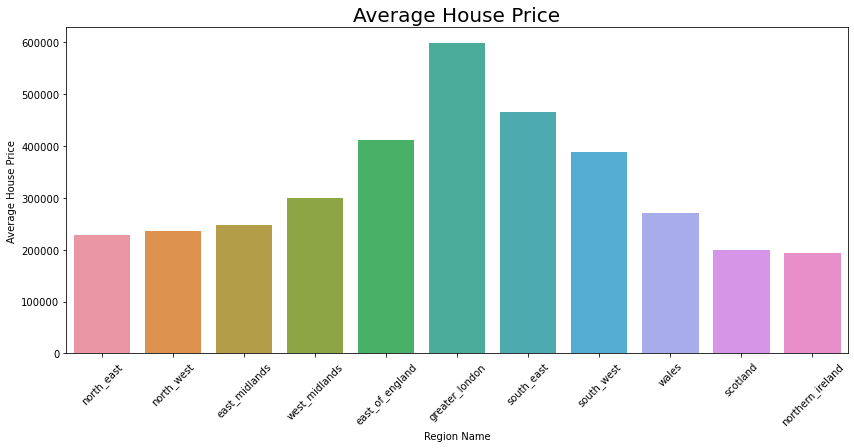

In [142]:
#plotting the average prices region wise
plt.figure(figsize=(14,6))
sns.barplot(x=region_list,y=reg_price)
plt.title('Average House Price',fontdict={'fontsize':20})
plt.xlabel("Region Name")
plt.ylabel('Average House Price(in pounds)')
plt.xticks(rotation = 45)
plt.show()

#### We can see from the above chart that the greater london region has the highest average prices amoung all regions in UK, whereas northern ireland has the lowest.

In [146]:
#calculating the average rents of the regions
reg_rent =[]
for reg in region_list:
    reg_rent.append(df_list[reg]['avg_rent'].mean())
reg_rent

[167.23034482758626,
 179.2582159624413,
 171.43833333333336,
 198.2769230769231,
 259.1965116279069,
 412.9697674418603,
 290.91729957805904,
 240.33733333333328,
 192.64883720930237,
 187.1318181818182,
 nan]

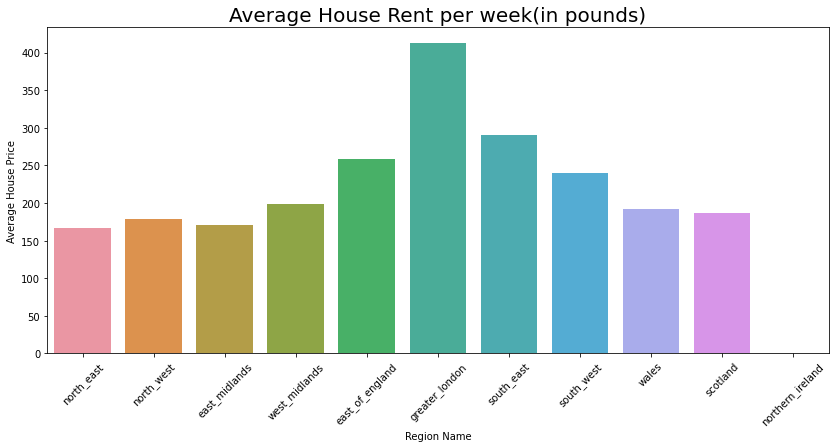

In [147]:
#plotting the average rents region wise
plt.figure(figsize=(14,6))
sns.barplot(x=region_list,y=reg_rent)
plt.title('Average House Rent per week(in pounds)',fontdict={'fontsize':20})
plt.xlabel("Region Name")
plt.ylabel('Average House Price')
plt.xticks(rotation = 45)
plt.show()

#### We can see from the above chart that the greater london region has the highest average prices amoung all regions in UK, whereas east midlands has the lowest. Moreover , no data is provided for northern ireland.

In [175]:
#calculating the average rents of the regions
reg_growth_1 =[]
for reg in region_list:
    reg_growth_1.append(df_list[reg]['growth_1y'].str.strip(",%").astype(float).mean())
                     
reg_growth_1

[-2.175462962962963,
 0.835548172757475,
 0.8803680981595097,
 0.7790909090909092,
 -0.04067796610169442,
 2.051094890510949,
 0.3724683544303802,
 -0.7556363636363631,
 1.8759776536312847,
 6.815957446808511,
 nan]

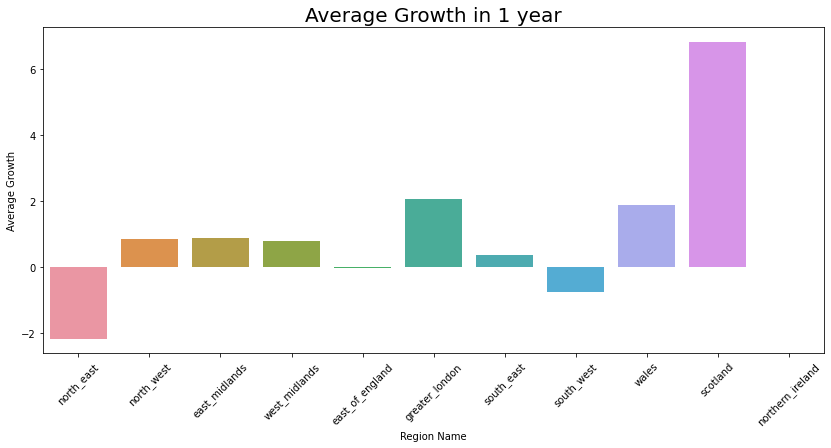

In [176]:
#plotting the average growth in a year region wise
fig =plt.figure(figsize=(14,6))
sns.barplot(x=region_list,y=reg_growth_1)
plt.title('Average Growth in 1 year',fontdict={'fontsize':20})
plt.xlabel("Region Name")
plt.ylabel('Average Growth')
plt.xticks(rotation = 45)
plt.show()

#### We can see from the above chart that the scotland has the highest average growth in one year time , while north east region has the lowest.Moreover, northern ireland data was not provided.

In [179]:
#calculating the average rents of the regions
reg_growth_2 =[]
for reg in region_list:
    reg_growth_2.append(df_list[reg]['growth_3y'].str.strip(",%").astype(float).mean())
                     
reg_growth_2

[7.508796296296289,
 14.699003322259134,
 14.017791411042952,
 14.17488584474886,
 10.625000000000004,
 10.661090909090902,
 11.846202531645565,
 14.12956204379562,
 19.159550561797747,
 10.082736156351796,
 nan]

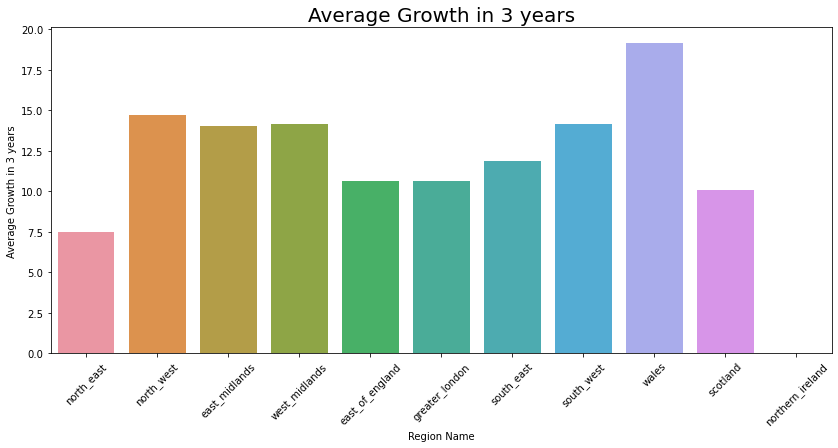

In [180]:
#plotting the average growth in a three years region wise
fig =plt.figure(figsize=(14,6))
sns.barplot(x=region_list,y=reg_growth_2)
plt.title('Average Growth in 3 years',fontdict={'fontsize':20})
plt.xlabel("Region Name")
plt.ylabel('Average Growth in 3 years')
plt.xticks(rotation = 45)
plt.show()

#### We can see from the above chart that the wales has the highest average growth in three years time , while north east region has the lowest.Moreover, northern ireland data was not provided.

In [181]:
#calculating the average rents of the regions
reg_growth_3 =[]
for reg in region_list:
    reg_growth_3.append(df_list[reg]['growth_5y'].str.strip(",%").astype(float).mean())
                     
reg_growth_3

[13.372685185185185,
 24.05233333333334,
 23.444171779141097,
 23.216289592760173,
 16.796610169491526,
 13.964102564102564,
 16.48006329113924,
 20.684363636363628,
 29.11761363636364,
 10.966666666666667,
 nan]

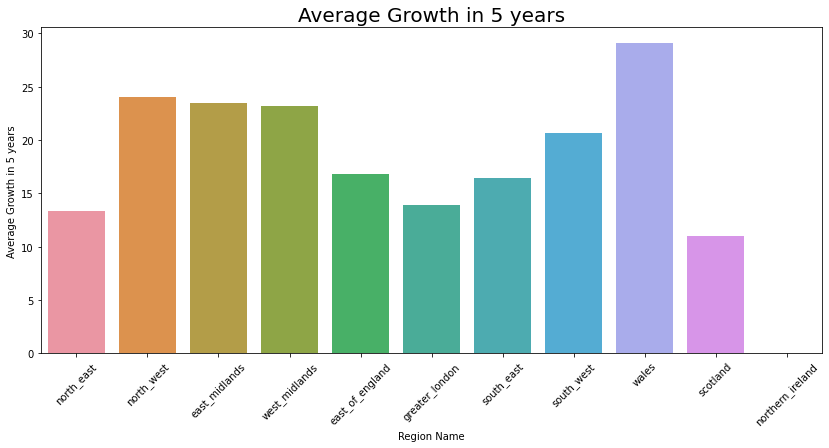

In [182]:
#plotting the average growth in a 5 years region wise
fig =plt.figure(figsize=(14,6))
sns.barplot(x=region_list,y=reg_growth_3)
plt.title('Average Growth in 5 years',fontdict={'fontsize':20})
plt.xlabel("Region Name")
plt.ylabel('Average Growth in 5 years')
plt.xticks(rotation = 45)
plt.show()

#### We can see from the above chart that the Wales has the highest average growth in five years time , while scotland region has the lowest.Moreover, northern ireland data was not provided.

In [184]:
df_list.keys()

dict_keys(['north_east', 'north_west', 'east_midlands', 'west_midlands', 'east_of_england', 'greater_london', 'south_east', 'south_west', 'wales', 'scotland', 'northern_ireland'])

In [187]:
with pd.ExcelWriter("all_places.xlsx") as writer:
    df_list['north_east'].to_excel(writer,sheet_name="north_east") 
    df_list['north_west'].to_excel(writer,sheet_name="north_west")
    df_list['east_midlands'].to_excel(writer,sheet_name="east_midlands")
    df_list['west_midlands'].to_excel(writer,sheet_name="west_midlands")
    df_list['east_of_england'].to_excel(writer,sheet_name="east_of_england")
    df_list['greater_london'].to_excel(writer,sheet_name="greater_london")
    df_list['south_east'].to_excel(writer,sheet_name="south_east")
    df_list['south_west'].to_excel(writer,sheet_name="south_west")
    df_list['wales'].to_excel(writer,sheet_name="wales")
    df_list['scotland'].to_excel(writer,sheet_name="scotland")
    df_list['northern_ireland'].to_excel(writer,sheet_name="northern_ireland")
